In [1]:
# load packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats

In [2]:
# function visualize
def visualize():
    sns.set_theme(style='whitegrid')
    # hits
    global fig_hits
    fig_hits = plt.figure(figsize=(8,8))
    plt.bar(df.columns, df.iloc[0], color='lightblue')
    plt.title('Hits per OOI', fontsize = 16)
    plt.ylabel('Number of hits', weight = 'bold')
    plt.xlabel('OOI', weight = 'bold')
    plt.show()
  
    # dwell_time
    global fig_dwelltime
    fig_dwelltime = plt.figure(figsize=(8,8))
    plt.bar(df.columns, df.iloc[1], color='lightblue')
    plt.title('Dwell time per OOI', fontsize = 16)
    plt.ylabel('Dwell time [s]', weight = 'bold')
    plt.xlabel('OOI', weight = 'bold')
    plt.show()

    # relative_dwell_time_ooi
    global fig_rel_dwelltime
    fig_rel_dwelltime = plt.figure(figsize=(8,8))
    plt.bar(df.columns, df.iloc[2], color='lightblue')
    plt.title('Relative Dwell Time per OOI to total OOI fixation time in percent', fontsize = 16)
    plt.ylabel('Relative dwell time [%]', weight = 'bold')
    plt.xlabel('OOI', weight = 'bold')
    plt.show()

In [3]:
### read, prepare and clean data
data = pd.read_csv('Data/TrainSet/Participant_Case1.txt', sep='\t')
# drop unused column 'Action'
data.drop(columns = ['Action'], inplace = True) 


In [4]:
# create list of OOIs
all_ooi = data.columns.values.tolist()[2:len(data)]

In [5]:
data

,start_time,end_time,App,Cap,Gauge,Pad,Pen,Safety,Tip
0,0.355,0.425,369.5,82.0,96.8,601.7,0.0,789.1,1600.0
1,0.450,1.449,391.4,106.0,72.8,624.3,0.0,764.9,197.0
2,1.568,1.658,374.6,80.5,1600.0,596.6,0.0,774.9,1600.0
3,1.939,2.069,344.4,58.6,1600.0,565.7,0.0,848.8,1600.0
4,2.236,2.326,229.6,50.2,168.0,479.4,0.0,1005.0,1600.0
...,...,...,...,...,...,...,...,...,...
147,58.283,58.613,314.1,166.1,86.1,504.8,0.0,945.0,1600.0
148,58.633,58.743,335.1,169.6,73.1,533.5,26.2,882.3,1600.0
149,58.801,58.891,358.9,104.7,1600.0,585.9,0.0,820.9,1600.0
150,58.956,59.316,442.7,93.0,1600.0,658.2,0.0,730.1,1600.0


In [6]:
# define pixel distance for OOI hit
pixel_distance = 20

In [7]:
# add column to data that states the fixation object(s) (question: can there be multiple OOI in one fixation? assumed: yes)
fixation_object = [] #*len(data)
for row in range(0,len(data)):
    fixation_object.append([])
    for col in range (2,len(data.columns)):
        if data.iloc[row][col] <= pixel_distance:
            fixation_object[row].append(data.columns[col])
    if fixation_object[row] == []:
        fixation_object[row] = ['Non-IOO']

data['fixation_object'] = fixation_object

In [8]:
data.head(50)

,start_time,end_time,App,Cap,Gauge,Pad,Pen,Safety,Tip,fixation_object
0,0.355,0.425,369.5,82.0,96.8,601.7,0.0,789.1,1600.0,[Pen]
1,0.450,1.449,391.4,106.0,72.8,624.3,0.0,764.9,197.0,[Pen]
2,1.568,1.658,374.6,80.5,1600.0,596.6,0.0,774.9,1600.0,[Pen]
3,1.939,2.069,344.4,58.6,1600.0,565.7,0.0,848.8,1600.0,[Pen]
4,2.236,2.326,229.6,50.2,168.0,479.4,0.0,1005.0,1600.0,[Pen]
5,2.395,2.625,196.0,0.0,227.2,504.8,8.0,1032.2,1600.0,"[Cap, Pen]"
6,2.648,2.798,256.1,11.0,270.4,570.2,44.1,942.2,1600.0,[Cap]
7,2.818,3.118,272.3,0.0,273.7,570.9,36.0,894.3,1600.0,[Cap]
8,3.218,3.308,445.6,118.1,513.6,822.7,178.8,1600.0,155.6,[Non-IOO]
9,3.368,3.458,394.3,321.9,462.1,775.6,118.6,1600.0,92.5,[Non-IOO]


In [9]:
# add column to data that states the fixation object
# fixation_object = []*len(data)
# fixation_object.append([])
# for row in range(0,len(data)):
#     for col in range (2,len(data.columns)):
#         if float(data.iloc[row][col]) < 20: #<= pixel_distance:
#             fixation_object[row].append(data.columns[col])
#         else:
#             fixation_object[row].append('Non-OOI')
#             #   fixation_object[row][1].append(data.columns[col])
#             # fixation_object[row] = data.columns[col]
# # data['fixation_object'] = fixation_object

In [10]:
# floats get long/wrong numbers:
data['end_time'][1]-data['start_time'][1]

0.9990000000000001

In [11]:
# calculate fixation time 
fixation_time = [0]*len(data)
for row in range (0,len(data)):
    fixation_time[row] = data['end_time'][row]-data['start_time'][row]
data['fixation_time'] = fixation_time

In [12]:
### check if still works with varying pixels
# alternative: calculate fixation time per object: do not calculate fixation time if fixation is not on OOI
# fixation_time = ['No fixation on OOI']*len(data)
# for row in range (0,len(data)):
#    if fixation_object[row] != 'Non-OOI':
#        fixation_time[row] = data['end_time'][row]-data['start_time'][row]
# data['fixation_time'] = fixation_time

In [13]:
data

,start_time,end_time,App,Cap,Gauge,Pad,Pen,Safety,Tip,fixation_object,fixation_time
0,0.355,0.425,369.5,82.0,96.8,601.7,0.0,789.1,1600.0,[Pen],0.070
1,0.450,1.449,391.4,106.0,72.8,624.3,0.0,764.9,197.0,[Pen],0.999
2,1.568,1.658,374.6,80.5,1600.0,596.6,0.0,774.9,1600.0,[Pen],0.090
3,1.939,2.069,344.4,58.6,1600.0,565.7,0.0,848.8,1600.0,[Pen],0.130
4,2.236,2.326,229.6,50.2,168.0,479.4,0.0,1005.0,1600.0,[Pen],0.090
...,...,...,...,...,...,...,...,...,...,...,...
147,58.283,58.613,314.1,166.1,86.1,504.8,0.0,945.0,1600.0,[Pen],0.330
148,58.633,58.743,335.1,169.6,73.1,533.5,26.2,882.3,1600.0,[Non-IOO],0.110
149,58.801,58.891,358.9,104.7,1600.0,585.9,0.0,820.9,1600.0,[Pen],0.090
150,58.956,59.316,442.7,93.0,1600.0,658.2,0.0,730.1,1600.0,[Pen],0.360


In [14]:
hits = []
for i in all_ooi:
    # print(i)
    hits.append(sum(x.count(i) for x in data['fixation_object']))

In [15]:
hits

[25, 22, 17, 21, 40, 25, 22]

In [16]:
# new dataframe with that collects all the new information
df = pd.DataFrame(columns = data.columns[2:-2])
df.loc[len(df)] = hits

In [17]:
data.iloc[5]['fixation_object']

['Cap', 'Pen']

In [18]:
'Cap' in data.iloc[5]['fixation_object']

True

In [19]:
# can surely be done in a better way
dwell_time = [0]*len(all_ooi)
i=0
for ooi in all_ooi:
    print(i)
    for row in range(0,len(data)):
        if ooi in data.iloc[row]['fixation_object']:
            dwell_time[i] = dwell_time[i] + data.iloc[row]['fixation_time']
    i=i+1
    
        

0
1
2
3
4
5
6


In [20]:
df.loc[len(df)] = dwell_time

In [21]:
# calculate total fixation time (= dwell time) per object and add to df
# dwell_time = data.groupby('fixation_object')['fixation_time'].sum()
# df.loc[len(df)] = dwell_time

In [22]:
df

,App,Cap,Gauge,Pad,Pen,Safety,Tip
0,25.000,22.00,17.000,21.00,40.000,25.000,22.00
1,15.853,3.34,4.589,3.63,9.019,9.278,3.85


In [23]:
# 2c: "calculate relative percentages that the participant spend looking at individual OOIs over the trial"
# assuming total time = total fixation time of hits (without saccades and without Non-OOIs, but multiple hits per fixation)
total_fixation_time_hits = sum(df.loc[1])
# total_fixation_time_ooi = sum(data['fixation_time']) - sum(data['fixation_time'][data['fixation_object']=='Non-OOI']) 

In [24]:
type(dwell_time)

list

In [25]:
#newList = [x / myInt for x in myList]
relative_dwell_time_hits = [x/total_fixation_time_hits*100 for x in dwell_time]

In [26]:
df.loc[len(df)] = relative_dwell_time_hits

In [27]:
df

,App,Cap,Gauge,Pad,Pen,Safety,Tip
0,25.000000,22.000000,17.00000,21.000000,40.000000,25.00000,22.000000
1,15.853000,3.340000,4.58900,3.630000,9.019000,9.27800,3.850000
2,31.988135,6.739442,9.25967,7.324603,18.198511,18.72112,7.768518


In [28]:
### makes no sense with multiple hits per fixation
# alternative: assuming total time = total time of the trial
# 2c: "calculate relative percentages that the participant spend looking at individual OOIs over the trial"
# total time = total time of the trial (60 sec)
# relative_dwell_time_trial = dwell_time/time_trial*100
# df.loc[len(df)] = relative_dwell_time_trial

In [29]:
# rename rows with index
df.index = ['hits', 'dwell_time', 'relative_dwell_time_hits']

In [30]:
print(df)

                                App        Cap     Gauge        Pad  \
hits                      25.000000  22.000000  17.00000  21.000000   
dwell_time                15.853000   3.340000   4.58900   3.630000   
relative_dwell_time_hits  31.988135   6.739442   9.25967   7.324603   

                                Pen    Safety        Tip  
hits                      40.000000  25.00000  22.000000  
dwell_time                 9.019000   9.27800   3.850000  
relative_dwell_time_hits  18.198511  18.72112   7.768518  


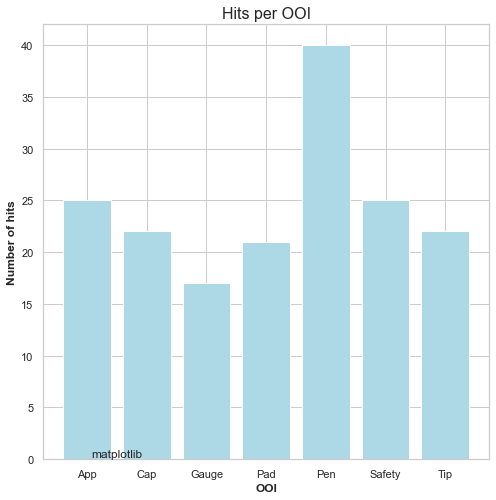

In [45]:
sns.set_theme(style='whitegrid')
# hits
global fig_hits
fig_hits = plt.figure(figsize=(8,8))
plt.bar(df.columns, df.iloc[0], color='lightblue')
plt.title('Hits per OOI', fontsize = 16)
plt.ylabel('Number of hits', weight = 'bold')
plt.xlabel('OOI', weight = 'bold')
plt.text(0.5, 0.5,'matplotlib',
     horizontalalignment='center',
     verticalalignment='center',
     )
plt.show()

In [ ]:
visualize()

In [ ]:
fig_hits.savefig('test.jpg')

In [ ]:
ddddata = pd.read_csv('Data\\TestSet\\Participant1_Case2.txt', sep='\t')

